In [1]:
import pandas as pd

# read data #

In [2]:
data = pd.read_csv('/content/online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# select input and output

In [4]:
y = data['Revenue']
data = data.drop(['Revenue'],axis='columns')
cl = data.columns

In [5]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


# transform text columns to categorial #

In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(data)
data = oe.fit_transform(data)
pd.DataFrame(data=data[1:,:],columns=cl)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,2.0,272.0,0.0,4673.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1871.0,4776.0,0.0,0.0,2.0,3.0,0.0,8.0,2.0,2.0,0.0
2,0.0,0.0,0.0,0.0,2.0,4.0,1725.0,4744.0,0.0,0.0,2.0,2.0,1.0,1.0,3.0,2.0,0.0
3,0.0,0.0,0.0,0.0,10.0,3674.0,1391.0,4164.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,2.0,1.0
4,0.0,0.0,0.0,0.0,19.0,862.0,1253.0,2714.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,3.0,1527.0,0.0,0.0,53.0,7103.0,747.0,3146.0,1098.0,0.0,1.0,3.0,5.0,0.0,0.0,2.0,1.0
12325,0.0,0.0,0.0,0.0,5.0,2831.0,0.0,2335.0,0.0,0.0,7.0,2.0,1.0,0.0,7.0,2.0,1.0
12326,0.0,0.0,0.0,0.0,6.0,1074.0,1816.0,4612.0,0.0,0.0,7.0,2.0,1.0,0.0,12.0,2.0,1.0
12327,4.0,761.0,0.0,0.0,15.0,2144.0,0.0,2298.0,0.0,0.0,7.0,1.0,1.0,2.0,10.0,2.0,0.0


# encode labels

In [7]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

# scale the data using min max

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)

X = scaler.transform(data)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05263158, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10526316, 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.63157895, 1.        ,
        1.        ],
       [0.15384615, 0.22825435, 0.        , ..., 0.52631579, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05263158, 0.        ,
        1.        ]])

# split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state = 42 ,) 

In [10]:
X_train.shape , X_test.shape

((9864, 17), (2466, 17))

# random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd = RandomForestClassifier()

rnd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# acc

In [12]:
from sklearn.metrics import accuracy_score as acc
acc(y_test , rnd.predict(X_test))

0.9018653690186537

# f1

In [13]:
from sklearn.metrics import f1_score as f1
f1(y_test , rnd.predict(X_test))

0.6420118343195267

# bac

In [14]:
from sklearn.metrics import balanced_accuracy_score as bac
bac(y_test , rnd.predict(X_test))

0.7655573253208188

# cross validation

In [15]:
from sklearn.metrics import make_scorer 
scoring = {'accuracy' : make_scorer(acc), 
           'bac' : make_scorer(bac), 
           'f1_score' : make_scorer(f1)}


from sklearn.model_selection import cross_validate


rsl = cross_validate(rnd, X, y, cv=5,scoring=scoring)
print('acc',rsl['test_accuracy'].mean())
print('bac',rsl['test_bac'].mean())
print('f1',rsl['test_f1_score'].mean())

acc 0.8961881589618816
bac 0.7596314441819215
f1 0.6267403382608971


# roc curve

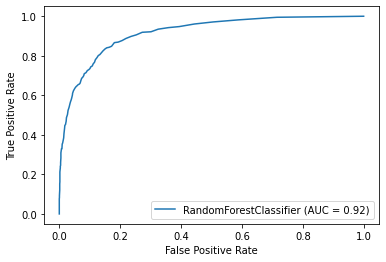

In [16]:
import matplotlib.pyplot as plt  
from sklearn import  metrics
metrics.plot_roc_curve(rnd, X_test, y_test)
plt.show()  

# decsion tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score as f1
dcs = DecisionTreeClassifier()
dcs.fit(X_train,y_train)

acc(y_test , dcs.predict(X_test))

0.8588807785888077

# f1

In [ ]:
f1(y_test , dcs.predict(X_test))

0.5336787564766841

# bac

In [ ]:
bac(y_test , dcs.predict(X_test))

0.7254876345328657

# cross validation

In [18]:
from sklearn.metrics import make_scorer 
scoring = {'accuracy' : make_scorer(acc), 
           'bac' : make_scorer(bac), 
           'f1_score' : make_scorer(f1)}


from sklearn.model_selection import cross_validate


rsl = cross_validate(dcs, X, y, cv=5,scoring=scoring)
print('acc',rsl['test_accuracy'].mean())
print('bac',rsl['test_bac'].mean())
print('f1',rsl['test_f1_score'].mean())

acc 0.8419302514193026
bac 0.7129701943688571
f1 0.5178725699412672


# roc curve

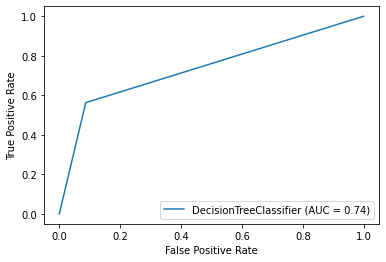

In [19]:
import matplotlib.pyplot as plt  
from sklearn import  metrics
metrics.plot_roc_curve(dcs, X_test, y_test)
plt.show()  

# xgboost

In [20]:
import xgboost as xgb


dtrain = xgb.DMatrix(X_train , label = y_train)

param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)

dtest = xgb.DMatrix(X_test)

In [21]:
prd = bst.predict(dtest)

prd_f =[]

for j in range(len(prd)):
  if prd[j]>=0.5:
    prd_f.append(1)
  else:
    prd_f.append(0)

#acc

In [22]:
acc(y_test , prd_f)

0.8872668288726683

#f1

In [23]:
f1(y_test , prd_f)

0.5573248407643312

#bac

In [24]:
bac(y_test , prd_f)

0.7120230426786989

# cross validation

In [25]:
bst = xgb.XGBClassifier()
from sklearn.metrics import make_scorer 
scoring = {'accuracy' : make_scorer(acc), 
           'bac' : make_scorer(bac), 
           'f1_score' : make_scorer(f1)}


from sklearn.model_selection import cross_validate


rsl = cross_validate(bst, X, y, cv=5,scoring=scoring)
print('acc',rsl['test_accuracy'].mean())
print('bac',rsl['test_bac'].mean())
print('f1',rsl['test_f1_score'].mean())

acc 0.8931062449310623
bac 0.7595017401687275
f1 0.6218969481769383


# roc curve

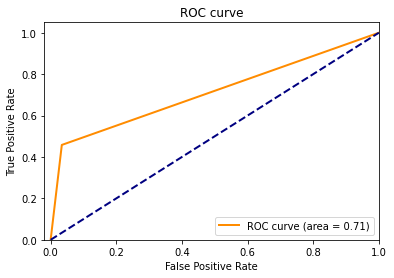

In [26]:
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
fpr, tpr, _ = roc_curve(y_test, prd_f)
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#svm

In [27]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)

acc(y_test,svc.predict(X_test))

0.8937550689375506

#f1

In [28]:
f1(y_test , svc.predict(X_test))

0.590625

#bac

In [29]:
bac(y_test,svc.predict(X_test))

0.7308274964576781

#cross validation

In [30]:
from sklearn.metrics import make_scorer 
scoring = {'accuracy' : make_scorer(acc), 
           'bac' : make_scorer(bac), 
           'f1_score' : make_scorer(f1)}


from sklearn.model_selection import cross_validate


rsl = cross_validate(svc, X, y, cv=5,scoring=scoring)
print('acc',rsl['test_accuracy'].mean())
print('bac',rsl['test_bac'].mean())
print('f1',rsl['test_f1_score'].mean())

acc 0.8939172749391728
bac 0.7349917269620919
f1 0.5922066628830729


#roc curve

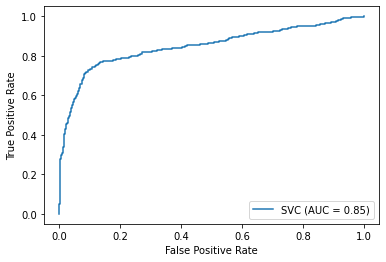

In [ ]:
import matplotlib.pyplot as plt  
from sklearn import  metrics
metrics.plot_roc_curve(svc, X_test, y_test)
plt.show() 